## Vector dimension reduction

When an embedding model supports MRL (Matryoshka Representation Learning), we can use it to reduce the dimensionality of the vectors. For large vector indexes, this can help to speed up search and reduce storage costs.

In [ ]:
# Load in the vectors from movies.json, {movie: [vector]}
import json

with open('embeddings/movies_text-embedding-3-small-1536.json') as f:
    movies_1536 = json.load(f)

with open('embeddings/movies_text-embedding-3-small-256.json') as f:
    movies_256t = json.load(f)

movie_title = "Moana"
print(len(movies_1536[movie_title]))
print(movies_1536[movie_title][0:5])

print(len(movies_256t[movie_title]))
print(movies_256t[movie_title][0:5])

1536
[0.03265173360705376, 0.01370371412485838, -0.017748944461345673, 0.024719391018152237, -0.010317315347492695]
256
[0.06316128373146057, 0.02650836855173111, -0.03433343395590782, 0.04781701788306236, -0.01995774172246456]


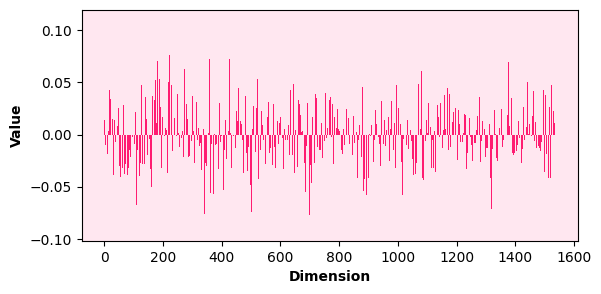

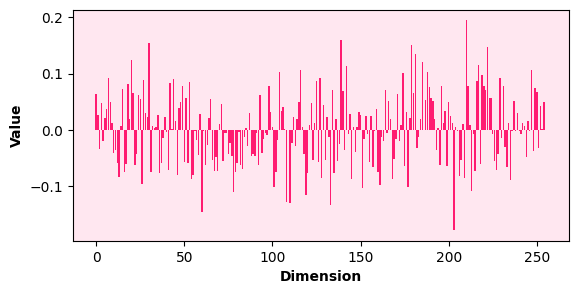

In [12]:
import matplotlib.pyplot as plt

def render_vector(vector, filename):
    """Visualize the values of the vector in a bar chart"""
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Set the face color of the axis (plot area) to light gray
    ax.set_facecolor('#ffe7f0')
    # Make sure the figure face color is transparent
    fig.patch.set_alpha(0.0)
    ax.bar(range(len(vector)), vector, color='#ff1c71')  # Set bar color to purple
    ax.set_xlabel('Dimension', fontweight='bold')  # Make x-axis label bold
    ax.set_ylabel('Value', fontweight='bold')  # Make y-axis label bold
    # Adjust the height of the graph
    fig.set_size_inches(fig.get_size_inches()[0], 3)
    plt.show()
    fig.savefig(filename, transparent=False, dpi=300, bbox_inches='tight')


render_vector(movies_1536['Moana'], "reduction_none.png")
render_vector(movies_256t['Moana'], "reduction_256.png")

## Effect on similarity space

In [5]:
# 10 most similar movies
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def most_similar(movie, movies):
    movie_vec = movies[movie]
    similarities = {k: cosine_similarity([movie_vec], [v])[0][0] for k, v in movies.items()}
    closest = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(closest, columns=['movie', 'similarity'])
    return df

most_similar('Moana', movies_1536)[:10]

,movie,similarity
0,Moana,1.000000
1,Mulan,0.546800
2,Lilo & Stitch,0.502114
3,The Little Mermaid,0.498209
4,Big Hero 6,0.491800
5,Monsters University,0.484857
6,The Princess and the Frog,0.471984
7,Finding Dory,0.471386
8,Maleficent,0.461029
9,Ice Princess,0.457817


In [6]:
most_similar('Moana', movies_256t)[:10]

,movie,similarity
0,Moana,1.000000
1,The Little Mermaid,0.587367
2,Mulan,0.583428
3,Lilo & Stitch,0.575990
4,Big Hero 6,0.574590
5,The Princess and the Frog,0.568726
6,Finding Dory,0.549391
7,The Lion King,0.521125
8,Tangled,0.513131
9,Maleficent,0.511412


## Size comparison

In [7]:
import sys

pd.DataFrame({
    '1536': [sys.getsizeof(movies_1536['Moana'])],
    '256': [sys.getsizeof(movies_256t['Moana'])],
})

,1536,256
0,12728,2200


In [8]:
sys.getsizeof(movies_1536['Moana'])/sys.getsizeof(movies_256t['Moana'])

5.785454545454545

## Resources

* [Unboxing Nomic Embed v1.5: Resizable Production Embeddings with MRL](https://www.nomic.ai/blog/posts/nomic-embed-matryoshka)
* [MRL from the Ground Up](https://aniketrege.github.io/blog/2024/mrl/)
